K-Nearest Neighbors Algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.

In [3]:
##Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
##ignore warnings
warnings.filterwarnings('ignore')
##sql in pandas
from pandasql import sqldf

import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## 1. DATASET

let's work on a case study you may find while working as a data scientist. Let's assume you are a data scientist at an online retailer, and you have been tasked with detecting fraudulent transactions. The only features you have at this stage are:

dist_from_home: The distance between the user's home location and where the transaction was made.

purchase_price_ratio: the ratio between the price of the item purchased in this transaction to the median purchase price of that user.

fraud: Indicates whether there was fraud or not.

In [4]:
##Creating random DB

df =  pd.DataFrame(np.random.randint(35,100,size=(100, 1)), columns=['dist_from_home'])
df['purchase_price_ratio'] = np.random.uniform(low=1.5, high=20, size=(df.shape[0],))
df['fraud'] = np.random.randint(0,2,size=(df.shape[0],))

display(df.head())

,dist_from_home,purchase_price_ratio,fraud
0,48,6.536897,1
1,49,12.685275,1
2,47,6.740757,0
3,50,19.109871,0
4,54,15.439054,1


FIRST, LET'S START MAKE SOME EXPLORATORY ANALYSIS INTO THE DATA

Lets create a scatter plot to better visualize the data.

This plot indicates that there is no visible pattern, but the cases of fraud/not-fraud seem to pocket in some regions.


<Axes: xlabel='dist_from_home', ylabel='purchase_price_ratio'>

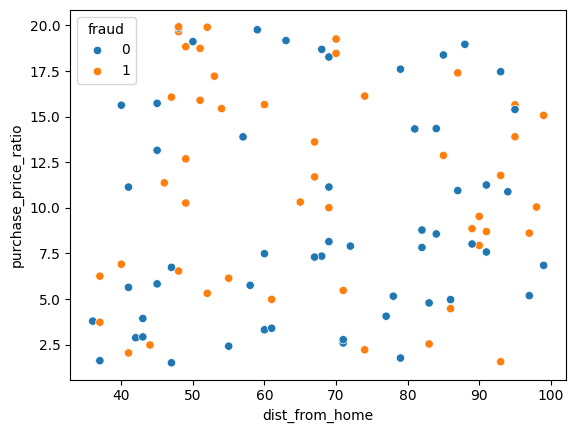

In [5]:
##Adding some viz in order to better understand the data

print('Let''s create a scatter plot to better visualize the data.\n')
print('This plot indicates that there is no visible pattern, but the cases of fraud/not-fraud seem to pocket in some regions.')


sns.scatterplot(x=df['dist_from_home'],y=df['purchase_price_ratio'], hue=df['fraud'])

Since the dataset is simple, I believe we don't need any further analysis. But with more complex data sets we could use some more insights/vizs.

Now let's normalize the data and split our set into training and test:

## 2. Normalizing & Splitting the Data:

When training any machine learning model, it is important to split the data into training and test data. The training data is used to fit the model. When training a kNN classifier, it's essential to normalize the features. This is because kNN measures the distance between points. The default is to use the Euclidean Distance, which is  the square root of the sum of the squared differences between two points.

 -PS: Equal Weightage:

In KNN, each neighbor contributes equally to the classification or regression task. If the features are not normalized, the features with larger scales will have a higher impact on the prediction than the features with smaller scales. This unequal weightage can lead to inaccurate predictions and biased results. Normalization ensures that all features are given equal weightage, leading to fair and unbiased predictions.

It is important so all the main independent variables have the "same weight" in the analysis.

In [6]:
## Now let's create and normalize our train/test set

# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Fitting and Evaluating the Model


We are now ready to train the model. 

For this, we’ll use a fixed value of 3 for k, but we may need to optimize this later on. We first create an instance of the kNN model, then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [7]:
## Training model

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

##make predictions

y_pred = knn.predict(X_test)

In [8]:
###Now let's check our accuracy

print('Now let''s take a look at our model''s accuracy.\n')

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('\nWe can see that this is not the best result. This may happen because the points are well distributed and mixed throughout the plot area.')

Now lets take a look at our models accuracy.

Accuracy: 0.45

We can see that this is not the best result. This may happen because the points are well distributed and mixed throughout the plot area.


## 4. Using Cross Validation to Get the Best Value of k

Unfortunately, there is no magic way to find the best value for k. We have to loop through many different values, then use our best judgment.

In the below code, we select a range of values for k and create an empty list to store our results. We use cross-validation to find the accuracy scores, which means we don’t need to create a training and test split, but we do need to scale our data. We then loop over the values and add the scores to our list.

Here we can see the results per number of neighbors considered.

We see that, because the data is evenly spread, the best result is achieved by considering less neighbors.

This make sense when wee consider that we have a random generated database. In real cases, it is ok to expect the data to be more pocketed by type



Text(0, 0.5, 'Accuracy Score')

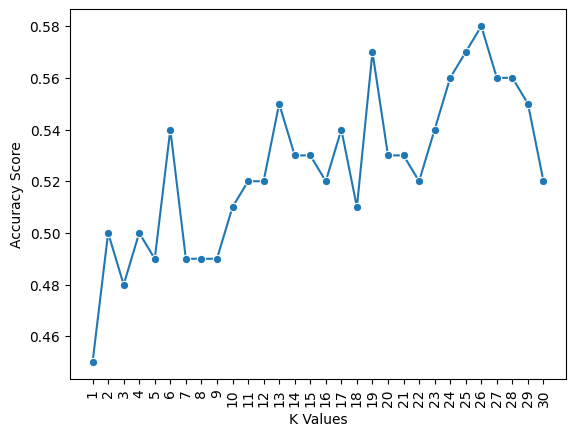

In [9]:
##Creating K-values string

k_values = [i for i in range (1,31)]
scores = []


##Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)


##Store values for each K in neighbor Numbers
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


print('Here we can see the results per number of neighbors considered.\n')
print('We see that, because the data is evenly spread, the best result is achieved by considering less neighbors.\n')
print('This make sense when wee consider that we have a random generated database. In real cases, it is ok to expect the data to be more pocketed by type\n')


##plot results

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.xticks(k_values, rotation = 'vertical')
plt.ylabel("Accuracy Score")


## 5. More Evaluation Metrics and Optimization

We can now train our model using the best k value using the code below.

In [10]:
##First let's train our model with the best k value
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

##Now we can get some metrics of the best model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Best K:",best_k)
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", round(recall,2))

Best K: 26
Accuracy: 0.5
Precision: 0.6
Recall: 0.27


- PS: A note about these metrics.

Accuracy is the proportion of test instances that were classified correctly. 

Precision is the proportion of test instances that were predicted to be positive that are truly positive.

Recall is the proportion of truly positive test instances that were predicted to be positive.